In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install anthropic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.7/870.7 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.9 MB/s eta 0:00:00


In [ ]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.6 MB/s eta 0:00:00


In [ ]:
# download SDXL Lightning model
!wget https://huggingface.co/ByteDance/SDXL-Lightning/resolve/main/sdxl_lightning_2step_unet.safetensors


--2024-04-21 20:42:33--  https://huggingface.co/ByteDance/SDXL-Lightning/resolve/main/sdxl_lightning_2step_unet.safetensors
Resolving huggingface.co (huggingface.co)... 13.33.33.102, 13.33.33.55, 13.33.33.110, ...
Connecting to huggingface.co (huggingface.co)|13.33.33.102|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.huggingface.co/repos/ae/a8/aea888ce05627728879b1954083956ea29cc3158dcdb28c0b7e3e8283ca1fa96/15a96a3b213b8b4d6ea720b4fa5bf6723cd877170bd1a90f58e34da2968ef854?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27sdxl_lightning_2step_unet.safetensors%3B+filename%3D%22sdxl_lightning_2step_unet.safetensors%22%3B&Expires=1713991353&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxMzk5MTM1M319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zL2FlL2E4L2FlYTg4OGNlMDU2Mjc3Mjg4NzliMTk1NDA4Mzk1NmVhMjljYzMxNThkY2RiMjhjMGI3ZTNlODI4M2NhMWZhOTYvMTVhOTZhM2IyMTN

In [ ]:
model_id = "stabilityai/stable-diffusion-xl-base-1.0"

# Load model
unet = UNet2DConditionModel.from_config(model_id, subfolder="unet").to("cuda", torch.float16)

unet.load_state_dict(load_file("sdxl_lightning_2step_unet.safetensors", device="cuda"))


unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

<All keys matched successfully>

In [ ]:
pipe = StableDiffusionXLPipeline.from_pretrained(model_id,
                                                 unet=unet,
                                                 torch_dtype=torch.float16,
                                                 variant="fp16").to("cuda")

In [ ]:
# Ensure sampler uses "trailing" timesteps
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing")

In [ ]:
!pwd

/content


In [ ]:
import zipfile
import math

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/ODL/new_train.zip') as train_zip:
    train_zip.extractall('data/train')


In [ ]:
import pickle

In [ ]:
with open("wrongly_classified.pkl", "rb") as file:
    x_loaded = pickle.load(file)

# Print the loaded list
print(x_loaded)

['/content/data/train/dog.31910.jpg', '/content/data/train/dog.30514.jpg', '/content/data/train/cat.10145.jpg', '/content/data/train/cat.2948.jpg', '/content/data/train/cat.31407.jpg', '/content/data/train/dog.31910.jpg', '/content/data/train/dog.30514.jpg', '/content/data/train/cat.10145.jpg', '/content/data/train/cat.2948.jpg', '/content/data/train/cat.31407.jpg', '/content/data/train/dog.1745.jpg', '/content/data/train/dog.2647.jpg', '/content/data/train/dog.6835.jpg', '/content/data/train/dog.11465.jpg', '/content/data/train/dog.11300.jpg', '/content/data/train/dog.10939.jpg', '/content/data/train/cat.3300.jpg', '/content/data/train/cat.709.jpg', '/content/data/train/dog.2099.jpg', '/content/data/train/dog.7553.jpg', '/content/data/train/dog.6680.jpg', '/content/data/train/dog.3994.jpg', '/content/data/train/cat.30306.jpg', '/content/data/train/dog.7265.jpg']


In [ ]:
ls /content/data

In [ ]:
import os

wrong_samples = []
# Open the file in read mode
with open('/content/drive/MyDrive/ODL/wrongly_classified.txt', 'r') as file:
    # Iterate over each line in the file
    for line in file:
        # Remove the newline character at the end of each line
        line = line.strip('\n')


        # Do something with the line
        wrong_samples.append(line)


In [ ]:
wrong_samples_use = x_loaded[:100]

In [ ]:
len(wrong_samples_use)

24

In [ ]:
wrong_samples = x_loaded

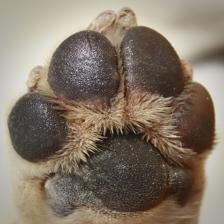

In [ ]:
Image.open(wrong_samples_use[0])

In [ ]:
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, Dataset

In [ ]:
import torch
from diffusers import StableDiffusionXLPipeline, UNet2DConditionModel, EulerDiscreteScheduler
from safetensors.torch import load_file

In [ ]:
import numpy as np
import math

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import warnings
from functools import partial
import ipywidgets as widgets
warnings.filterwarnings("ignore")
def trunc_normal_(tensor, mean=0., std=1., a=-2., b=2.):
    # type: (Tensor, float, float, float, float) -> Tensor
    return _no_grad_trunc_normal_(tensor, mean, std, a, b)


def _no_grad_trunc_normal_(tensor, mean, std, a, b):
    def norm_cdf(x):
        # Computes standard normal cumulative distribution function
        return (1. + math.erf(x / math.sqrt(2.))) / 2.


def drop_path(x, drop_prob: float = 0., training: bool = False):
    if drop_prob == 0. or not training:
        return x
    keep_prob = 1 - drop_prob
    # work with diff dim tensors, not just 2D ConvNets
    shape = (x.shape[0],) + (1,) * (x.ndim - 1)
    random_tensor = keep_prob + \
        torch.rand(shape, dtype=x.dtype, device=x.device)
    random_tensor.floor_()  # binarize
    output = x.div(keep_prob) * random_tensor
    return output


class DropPath(nn.Module):
    """
    Drop paths (Stochastic Depth) per sample  (when applied in main path of residual blocks).
    """

    def __init__(self, drop_prob=None):
        super(DropPath, self).__init__()
        self.drop_prob = drop_prob

    def forward(self, x):
        return drop_path(x, self.drop_prob, self.training)


class Mlp(nn.Module):
    def __init__(self, in_features, hidden_features=None, out_features=None, act_layer=nn.GELU, drop=0.):
        super().__init__()
        out_features = out_features or in_features
        hidden_features = hidden_features or in_features
        self.fc1 = nn.Linear(in_features, hidden_features)
        self.act = act_layer()
        self.fc2 = nn.Linear(hidden_features, out_features)
        self.drop = nn.Dropout(drop)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.drop(x)
        return x


class Attention(nn.Module):
    def __init__(self, dim, num_heads=8, qkv_bias=False, qk_scale=None, attn_drop=0., proj_drop=0.):
        super().__init__()
        self.num_heads = num_heads
        head_dim = dim // num_heads
        self.scale = qk_scale or head_dim ** -0.5

        self.qkv = nn.Linear(dim, dim * 3, bias=qkv_bias)
        self.attn_drop = nn.Dropout(attn_drop)
        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(proj_drop)

    def forward(self, x):
        B, N, C = x.shape
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, C //
                                  self.num_heads).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]

        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        attn = self.attn_drop(attn)

        x = (attn @ v).transpose(1, 2).reshape(B, N, C)
        x = self.proj(x)
        x = self.proj_drop(x)
        return x, attn


class Block(nn.Module):
    def __init__(self, dim, num_heads, mlp_ratio=4., qkv_bias=False, qk_scale=None, drop=0., attn_drop=0.,
                 drop_path=0., act_layer=nn.GELU, norm_layer=nn.LayerNorm):
        super().__init__()
        self.norm1 = norm_layer(dim)
        self.attn = Attention(
            dim, num_heads=num_heads, qkv_bias=qkv_bias, qk_scale=qk_scale, attn_drop=attn_drop, proj_drop=drop)
        self.drop_path = DropPath(
            drop_path) if drop_path > 0. else nn.Identity()
        self.norm2 = norm_layer(dim)
        mlp_hidden_dim = int(dim * mlp_ratio)
        self.mlp = Mlp(in_features=dim, hidden_features=mlp_hidden_dim,
                       act_layer=act_layer, drop=drop)

    def forward(self, x, return_attention=False):
        y, attn = self.attn(self.norm1(x))
        if return_attention:
            return attn
        x = x + self.drop_path(y)
        x = x + self.drop_path(self.mlp(self.norm2(x)))
        return x


class PatchEmbed(nn.Module):
    """
    Image to Patch Embedding
    """

    def __init__(self, img_size=224, patch_size=16, in_chans=3, embed_dim=768):
        super().__init__()
        num_patches = (img_size // patch_size) * (img_size // patch_size)
        self.img_size = img_size
        self.patch_size = patch_size
        self.num_patches = num_patches

        self.proj = nn.Conv2d(in_chans, embed_dim,
                              kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        B, C, H, W = x.shape
        x = self.proj(x).flatten(2).transpose(1, 2)
        return x


class VisionTransformer(nn.Module):
    """
    Vision Transformer
    """

    def __init__(self, img_size=[224], patch_size=16, in_chans=3, num_classes=0, embed_dim=768, depth=12,
                 num_heads=12, mlp_ratio=4., qkv_bias=False, qk_scale=None, drop_rate=0., attn_drop_rate=0.,
                 drop_path_rate=0., norm_layer=nn.LayerNorm, **kwargs):
        super().__init__()
        self.num_features = self.embed_dim = embed_dim

        self.patch_embed = PatchEmbed(
            img_size=img_size[0], patch_size=patch_size, in_chans=in_chans, embed_dim=embed_dim)
        num_patches = self.patch_embed.num_patches

        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.pos_embed = nn.Parameter(
            torch.zeros(1, num_patches + 1, embed_dim))
        self.pos_drop = nn.Dropout(p=drop_rate)

        # stochastic depth decay rule
        dpr = [x.item() for x in torch.linspace(0, drop_path_rate, depth)]
        self.blocks = nn.ModuleList([
            Block(
                dim=embed_dim, num_heads=num_heads, mlp_ratio=mlp_ratio, qkv_bias=qkv_bias, qk_scale=qk_scale,
                drop=drop_rate, attn_drop=attn_drop_rate, drop_path=dpr[i], norm_layer=norm_layer)
            for i in range(depth)])
        self.norm = norm_layer(embed_dim)

        # Classifier head
        self.head = nn.Linear(
            embed_dim, num_classes) if num_classes > 0 else nn.Identity()

        trunc_normal_(self.pos_embed, std=.02)
        trunc_normal_(self.cls_token, std=.02)
        self.apply(self._init_weights)

    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            trunc_normal_(m.weight, std=.02)
            if isinstance(m, nn.Linear) and m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.LayerNorm):
            nn.init.constant_(m.bias, 0)
            nn.init.constant_(m.weight, 1.0)

    def interpolate_pos_encoding(self, x, w, h):
        npatch = x.shape[1] - 1
        N = self.pos_embed.shape[1] - 1
        if npatch == N and w == h:
            return self.pos_embed
        class_pos_embed = self.pos_embed[:, 0]
        patch_pos_embed = self.pos_embed[:, 1:]
        dim = x.shape[-1]
        w0 = w // self.patch_embed.patch_size
        h0 = h // self.patch_embed.patch_size
        # we add a small number to avoid floating point error in the interpolation
        # see discussion at https://github.com/facebookresearch/dino/issues/8
        w0, h0 = w0 + 0.1, h0 + 0.1
        patch_pos_embed = nn.functional.interpolate(
            patch_pos_embed.reshape(1, int(math.sqrt(N)), int(
                math.sqrt(N)), dim).permute(0, 3, 1, 2),
            scale_factor=(w0 / math.sqrt(N), h0 / math.sqrt(N)),
            mode='bicubic',
        )
        assert int(
            w0) == patch_pos_embed.shape[-2] and int(h0) == patch_pos_embed.shape[-1]
        patch_pos_embed = patch_pos_embed.permute(0, 2, 3, 1).view(1, -1, dim)
        return torch.cat((class_pos_embed.unsqueeze(0), patch_pos_embed), dim=1)

    def prepare_tokens(self, x):
        B, nc, w, h = x.shape
        x = self.patch_embed(x)  # patch linear embedding

        # add the [CLS] token to the embed patch tokens
        cls_tokens = self.cls_token.expand(B, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)

        # add positional encoding to each token
        x = x + self.interpolate_pos_encoding(x, w, h)

        return self.pos_drop(x)

    def forward(self, x):
        x = self.prepare_tokens(x)
        for blk in self.blocks:
            x = blk(x)
        x = self.norm(x)
        return x[:, 0]

    def get_last_selfattention(self, x):
        x = self.prepare_tokens(x)
        for i, blk in enumerate(self.blocks):
            if i < len(self.blocks) - 1:
                x = blk(x)
            else:
                # return attention of the last block
                return blk(x, return_attention=True)

    def get_intermediate_layers(self, x, n=1):
        x = self.prepare_tokens(x)
        # we return the output tokens from the `n` last blocks
        output = []
        for i, blk in enumerate(self.blocks):
            x = blk(x)
            if len(self.blocks) - i <= n:
                output.append(self.norm(x))
        return output


class VitGenerator(object):
    def __init__(self, name_model, patch_size, device, evaluate=True, random=False, verbose=False):
        self.name_model = name_model
        self.patch_size = patch_size
        self.evaluate = evaluate
        self.device = device
        self.verbose = verbose
        self.model = self._getModel()
        self._initializeModel()
        if not random:
            self._loadPretrainedWeights()

    def _getModel(self):
        if self.verbose:
            print(
                f"[INFO] Initializing {self.name_model} with patch size of {self.patch_size}")
        if self.name_model == 'vit_tiny':
            model = VisionTransformer(patch_size=self.patch_size, embed_dim=192, depth=12, num_heads=3, mlp_ratio=4,
                                      qkv_bias=True, norm_layer=partial(nn.LayerNorm, eps=1e-6))

        elif self.name_model == 'vit_small':
            model = VisionTransformer(patch_size=self.patch_size, embed_dim=384, depth=12, num_heads=6, mlp_ratio=4,
                                      qkv_bias=True, norm_layer=partial(nn.LayerNorm, eps=1e-6))

        elif self.name_model == 'vit_base':
            model = VisionTransformer(patch_size=self.patch_size, embed_dim=768, depth=12, num_heads=12, mlp_ratio=4,
                                      qkv_bias=True, norm_layer=partial(nn.LayerNorm, eps=1e-6))
        else:
            raise f"No model found with {self.name_model}"

        return model

    def _initializeModel(self):
        if self.evaluate:
            for p in self.model.parameters():
                p.requires_grad = False

            self.model.eval()

        self.model.to(self.device)

    def _loadPretrainedWeights(self):
        if self.verbose:
            print("[INFO] Loading weights")
        url = None
        if self.name_model == 'vit_small' and self.patch_size == 16:
            url = "dino_deitsmall16_pretrain/dino_deitsmall16_pretrain.pth"

        elif self.name_model == 'vit_small' and self.patch_size == 8:
            url = "dino_deitsmall8_300ep_pretrain/dino_deitsmall8_300ep_pretrain.pth"

        elif self.name_model == 'vit_base' and self.patch_size == 16:
            url = "dino_vitbase16_pretrain/dino_vitbase16_pretrain.pth"

        elif self.name_model == 'vit_base' and self.patch_size == 8:
            url = "dino_vitbase8_pretrain/dino_vitbase8_pretrain.pth"

        elif self.name_model == 'vit_tiny' and self.patch_size == 16:
            url = "https://huggingface.co/WinKawaks/vit-tiny-patch16-224/resolve/main/pytorch_model.bin?download=true"

        if url is None:
            print(
                f"Since no pretrained weights have been found with name {self.name_model} and patch size {self.patch_size}, random weights will be used")

        else:
            state_dict = torch.hub.load_state_dict_from_url(#url)
                url="https://dl.fbaipublicfiles.com/dino/" + url)
            self.model.load_state_dict(state_dict, strict=True)

    def get_last_selfattention(self, img):
        return self.model.get_last_selfattention(img.to(self.device))

    def __call__(self, x):
        return self.model(x)
def transform(img, img_size):
    img = transforms.Resize(img_size)(img)
    img = transforms.ToTensor()(img)
    return img


def visualize_predict(model, img, img_size, patch_size, device, x):
    img_pre = transform(img, img_size)
    attention = visualize_attention(model, img_pre, patch_size, device)
    plot_attention(img, attention, x)


def visualize_attention(model, img, patch_size, device):
    # make the image divisible by the patch size
    w, h = img.shape[1] - img.shape[1] % patch_size, img.shape[2] - \
        img.shape[2] % patch_size
    img = img[:, :w, :h].unsqueeze(0)

    w_featmap = img.shape[-2] // patch_size
    h_featmap = img.shape[-1] // patch_size

    attentions = model.get_last_selfattention(img.to(device))

    nh = attentions.shape[1]  # number of head

    # keep only the output patch attention
    attentions = attentions[0, :, 0, 1:].reshape(nh, -1)

    attentions = attentions.reshape(nh, w_featmap, h_featmap)
    attentions = nn.functional.interpolate(attentions.unsqueeze(
        0), scale_factor=patch_size, mode="nearest")[0].cpu().detach().numpy()

    return attentions


import numpy as np
import matplotlib.pyplot as plt

def plot_attention(img, attention, x):
    n_heads = attention.shape[0]

    plt.figure(figsize=(10, 10))
    text = ["Original Image", "Head Mean"]
    for i, fig in enumerate([img, np.mean(attention, 0)]):
        plt.subplot(1, 2, i+1)
        plt.imshow(fig, cmap='inferno')
        plt.title(text[i])

    plt.savefig(f"/content/attention_maps/attention_map_{x}.jpg")  # Save the plot as a JPEG image
    plt.close()

    # plt.figure(figsize=(10, 10))
    # for i in range(n_heads):
    #     plt.subplot(n_heads//3, 3, i+1)
    #     plt.imshow(attention[i], cmap='inferno')
    #     if i == 1:  # If it's the attention map
    #       plt.imshow(img, cmap='gray', alpha=1)  # Overlay original image with transparency
    #       plt.imshow(fig, cmap='inferno', alpha=0.5)
    #     plt.title(f"Head n: {i+1}")
    # plt.tight_layout()
    # plt.show()



class Loader(object):
    def __init__(self):
        self.uploader = widgets.FileUpload(accept='image/*', multiple=False)
        self._start()

    def _start(self):
        display(self.uploader)

    def getLastImage(self):
        try:
            for uploaded_filename in self.uploader.value:
                uploaded_filename = uploaded_filename
            img = Image.open(io.BytesIO(
                bytes(self.uploader.value[uploaded_filename]['content'])))

            return img
        except:
            return None

    def saveImage(self, path):
        with open(path, 'wb') as output_file:
            for uploaded_filename in self.uploader.value:
                content = self.uploader.value[uploaded_filename]['content']
                output_file.write(content)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
if device.type == "cuda":
    torch.cuda.set_device(0)

name_model = 'vit_small'

In [ ]:
#creating a folder for attention maps

os.makedirs('attention_maps', exist_ok=True)



In [ ]:

model = torch.load('/content/drive/MyDrive/ODL/vit_generator_model_apr19_1950_cleansplit.pth')

In [ ]:
for i in range(len(wrong_samples_use)):
  patch_size = 8
  path = wrong_samples_use[i]
  img = Image.open(path)
  factor_reduce = 1
  img_size = tuple(np.array(img.size[::-1]) // factor_reduce)
  visualize_predict(model, img, img_size, patch_size, device, i)


In [ ]:
os.makedirs('gen_images', exist_ok=True)

In [ ]:
import anthropic
import base64
import httpx



client = anthropic.Anthropic(
    #removed for security purposes",
)
 
for i in range(len(wrong_samples_use)):


  image1_url = wrong_samples_use[i]
  if "dog" in image1_url:
    class_flag = "dog"
    class_reflag = "cat"
  else:
    class_flag = "cat"
    class_reflag = "dog"
  image1_media_type = "image/jpeg"
  # Open the image file and read the data as bytes
  with open(image1_url, "rb") as image_file:
      image1_data = base64.b64encode(image_file.read()).decode("utf-8")


  # image2_url = "https://upload.wikimedia.org/wikipedia/commons/b/b5/Iridescent.green.sweat.bee1.jpg"
  # image2_media_type = "image/jpeg"
  # image2_data = base64.b64encode(httpx.get(image2_url).content).decode("utf-8")

  message = client.messages.create(
      model="claude-3-sonnet-20240229",
      max_tokens=1024,
      messages=[
          {
              "role": "user",
              "content": [
                  {
                      "type": "image",
                      "source": {
                          "type": "base64",
                          "media_type": image1_media_type,
                          "data": image1_data,
                      },
                  },
                  {
                      "type": "text",
                      "text": f"This image has the {class_flag}/{class_flag}s as original image on the left and the attention map for that on the right, generated by a ViT model for cats vs dogs classification task. The model incorrectly classified the image as {class_reflag}. Analyze where the model is focusing on and explain what difficulties the original image has that made the model misclassify this as {class_reflag}. Analyze the color and structure of {class_flag}. Be precise about the location of attention."
                  }
              ],
          }
      ],
  )
  message_0 = message.content[0].text

  ####################################################
  message_1 = client.messages.create(
      model="claude-3-sonnet-20240229",
      max_tokens=1024,
      messages=[
          {
              "role": "user",
              "content": [
                  {
                      "type": "text",
                      "text": f"{message_0}. Our objective is to improve our ViT model to classify the image as {class_flag} by fine tuning with more images generated by a SDXL model. We believe this can improve the ViT's focus on image. So, Can you only give a prompt(word limit 100) that should be given to SDXL to generate single image that would improve in fine-tuning the ViT. Ensure that the generated image contains challenges or difficulties similar to those present in the wrongly classified image.The color of the {class_flag} in original image is an important factor when genrating the prompt. This will enable the model to learn to classify such challenging scenarios effectively. Only include the prompt without any other text"
                  }
              ],
          }
      ],
  )

  #####################################################
  prompt_sdxl = message_1.content[0].text

  ######################################################

  # image generation


  # images = []
  # for prompt in prompts:
  for j in range(5):
    image = pipe(prompt_sdxl,
                num_inference_steps=2,
                width = 1024,
                height = 1024,
                guidance_scale=0).images



    image[0].save(f"gen_images/image_{class_flag}_{i}_{j}.jpg")

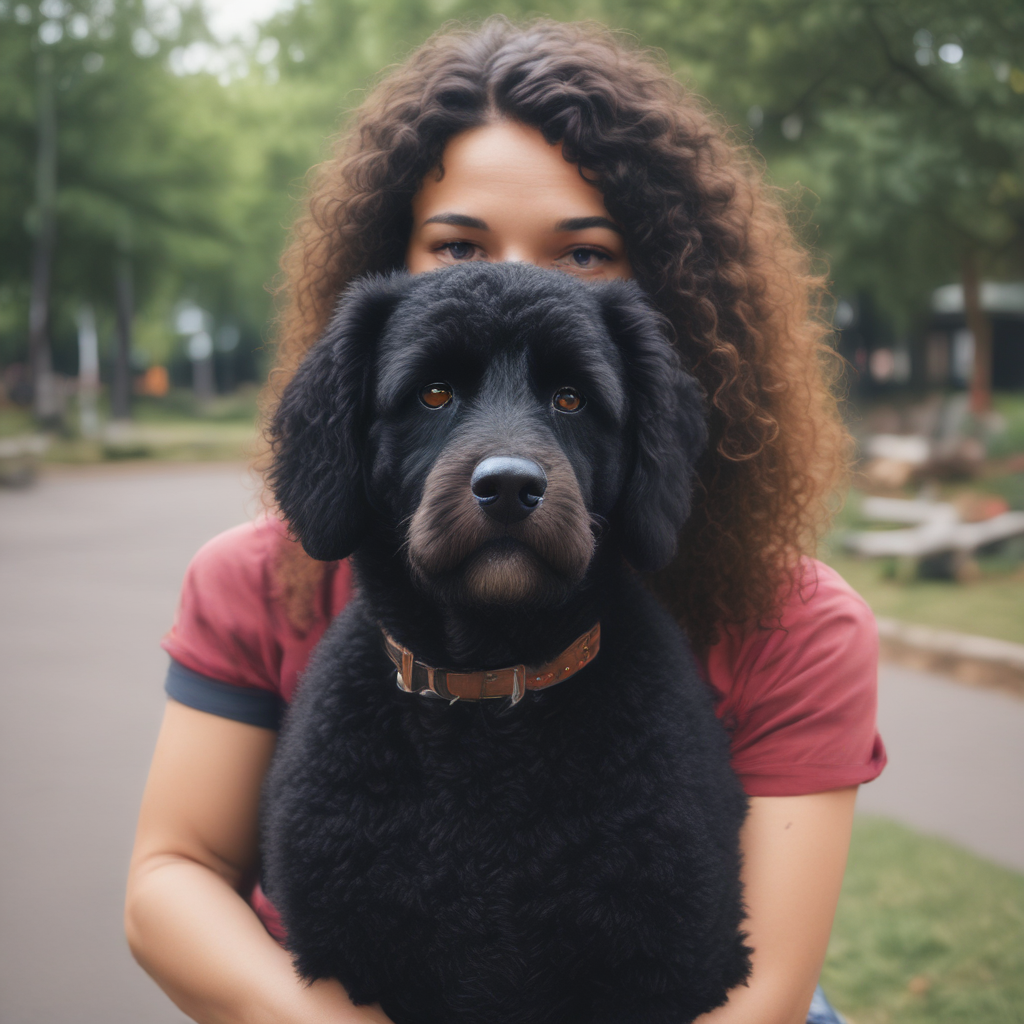

In [ ]:
image[0]

In [ ]:
type(image[0])

In [ ]:
image[0].save("image_name.jpg")

In [ ]:
!zip -r gen_images.zip /content/gen_images